In [1]:
# 데이터 시각화가 왜 필요한지?
import pandas as pd
import seaborn as sns         # 자동으로 예쁜 그래프 그려줌   //  연습용 데이터도 제공 
import matplotlib.pyplot as plt     # 데이터 시각화 기반 

In [10]:
anscombe = sns.load_dataset("anscombe")
anscombe

data1 = anscombe[anscombe["dataset"] == "I"]      # anscombe에서 dataset열의 값이 I인것만 뽑아서 data1로
data2 = anscombe[anscombe["dataset"] == "II"]
data3 = anscombe[anscombe["dataset"] == "III"]
data4 = anscombe[anscombe["dataset"] == "IV"]

print(data1['x'].mean(), data1['y'].mean())       # data1의 x열의 평균, y열의 평균 
print(data2['x'].mean(), data2['y'].mean())
print(data3['x'].mean(), data3['y'].mean())
print(data4['x'].mean(), data4['y'].mean())

# 평균은 비슷하나, 같다고 할 수 있나?  =>  표준편차도 구해볼것

9.0 7.500909090909093
9.0 7.50090909090909
9.0 7.5
9.0 7.500909090909091


In [11]:
print(data1['x'].std(), data1['y'].std())       # data1의 x열의 표준편차, y열의 표준편차 
print(data2['x'].std(), data2['y'].std())
print(data3['x'].std(), data3['y'].std())
print(data4['x'].std(), data4['y'].std())

# 표준편차도 비슷.  네 개의 집단이 비슷하다는 의심 가능

3.3166247903554 2.031568135925815
3.3166247903554 2.0316567355016177
3.3166247903554 2.030423601123667
3.3166247903554 2.0305785113876023


In [13]:
print(data1['x'].corr(data1['y']))            # x열과 y열의 상관관계
print(data2['x'].corr(data2['y']))
print(data3['x'].corr(data3['y']))
print(data4['x'].corr(data4['y']))

# 상관관계도 봤을 때, 이것도 비슷하다.
# 네 집단이 진짜 거의 같아보이나,  그림으로 확인해보자

0.81642051634484
0.8162365060002428
0.8162867394895984
0.8165214368885028


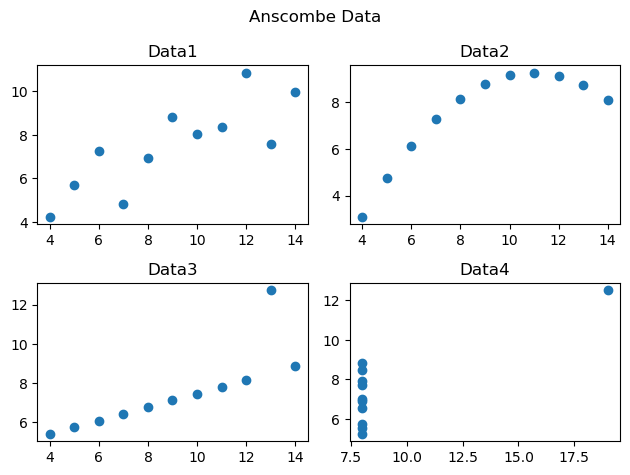

In [22]:
fig = plt.figure()                 # figure : 흰색 도화지를 준비

ax1 = fig.add_subplot(2, 2, 1)       # add_subplot : 각각의 틀 만든다                 # 2행 2열의 1번째자리
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(data1['x'], data1['y'])     # scatter : 산점도 (점그래프)
ax2.scatter(data2['x'], data2['y']) 
ax3.scatter(data3['x'], data3['y']) 
ax4.scatter(data4['x'], data4['y']) 

ax1.set_title("Data1")                # set_title : 제목 설정
ax2.set_title("Data2")
ax3.set_title("Data3")
ax4.set_title("Data4")

fig.suptitle("Anscombe Data")        # suptitle : 메인제목 설정
fig.tight_layout()                # tight_layout : 레이아웃 알아서 맞춰라 

plt.savefig("Anscombe.png")      # savefig : 파일로 저장

plt.show()

## 수치상으론 다 비슷해보였으나, 그림 그려본 결과 다 다르게 나온다!!!! =>  수치만을 믿어서는 안 됨.

In [23]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


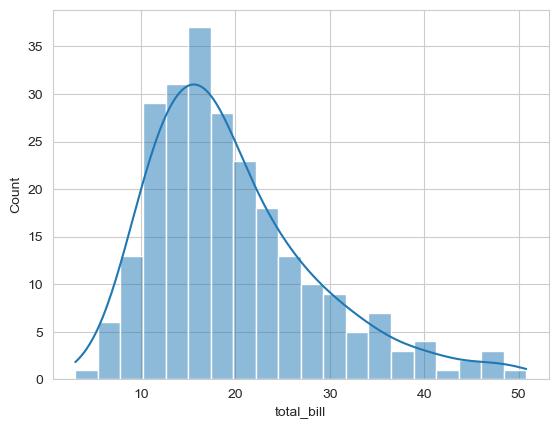

In [30]:
# 일변량 그래프(연속형 데이터) : 히스토그램  //  이상치 탐지 시에도 자주 사용
sns.set_style("whitegrid")     # set_style : 격자 및 테마 설정 가능?    (white, whitegrid, dark, darkgrid)
sns.histplot(data=tips, x = "total_bill", bins = 20,       ## histplot : 히스토그램 그려줌 - 데이터출처, x축 순     
             kde = True)         # 막대 개수 20개 / 밀도 함수도 같이 그려라
plt.savefig("hist.png")
plt.show()

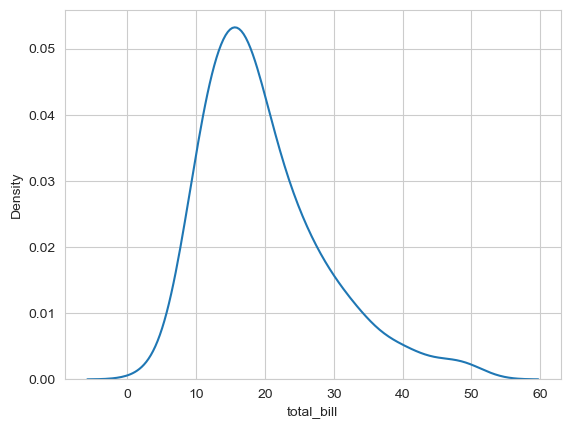

In [49]:
sns.kdeplot(data=tips, x = "total_bill")            # 밀도함수그래프를 그림
plt.show()

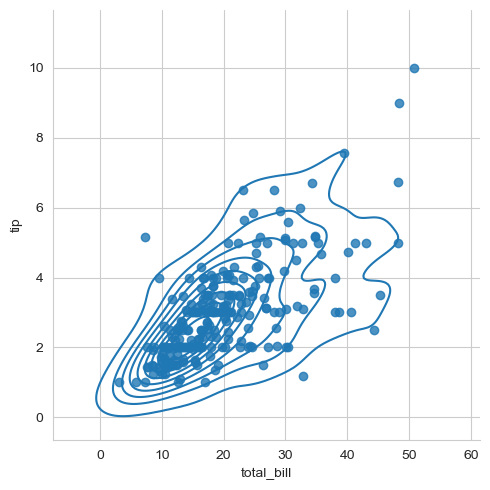

In [51]:
# 이변량 그래프 (둘다 연속형) : 산점도          ## lmplot 
sns.lmplot(data=tips, x = 'total_bill', y = 'tip',  
          fit_reg = False)         # 추세선 안뜨게 할수도 있음 
sns.kdeplot(data=tips, x = "total_bill", y = "tip")          # 밀도함수도 같이
plt.show()

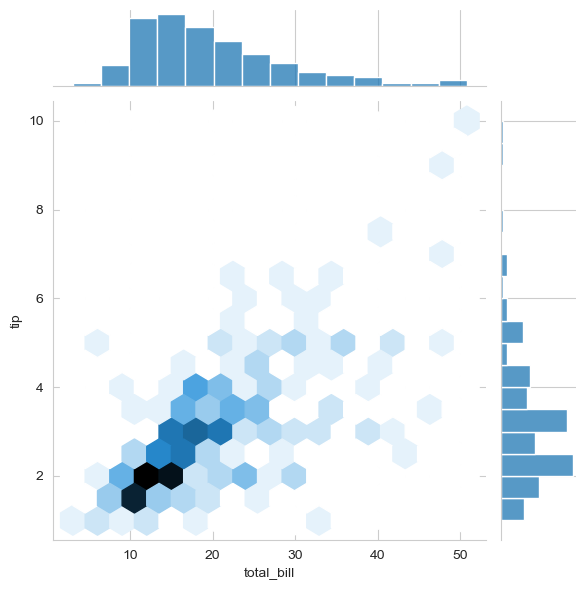

In [35]:
# 산점도 + 히스토그램
sns.jointplot(data=tips, x = "total_bill", y = "tip",        # jointplot
              kind = "hex")          # 산점도를 육각형으로 그려줌
plt.show() 

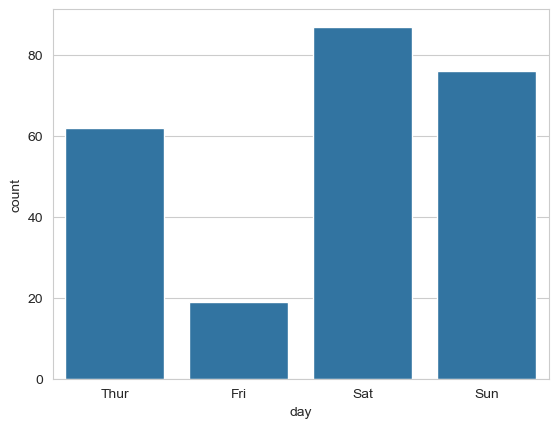

In [36]:
# 일변량 그래프(범주형 데이터) : 빈도 막대 그래프         ## countplot
sns.countplot(data=tips, x = "day")
plt.show()

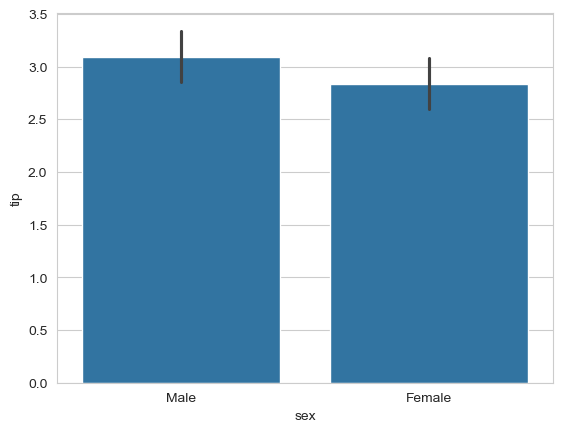

In [39]:
# 평균 막대 그래프 (이변량 그래프)  범주형, 연속형
sns.barplot(data=tips, x = "sex", y = "tip")        # 빈도가 아니고 평균값을 막대로 표시한것
plt.show()

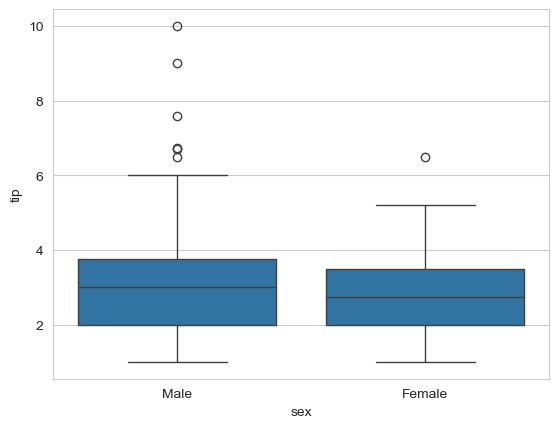

In [41]:
# 박스 플롯 : 이상치 탐지
sns.boxplot(data=tips, x = "sex", y = "tip")
plt.show()        # 박스 위쪽이 25%, 아래쪽이 75% 구간 나타냄

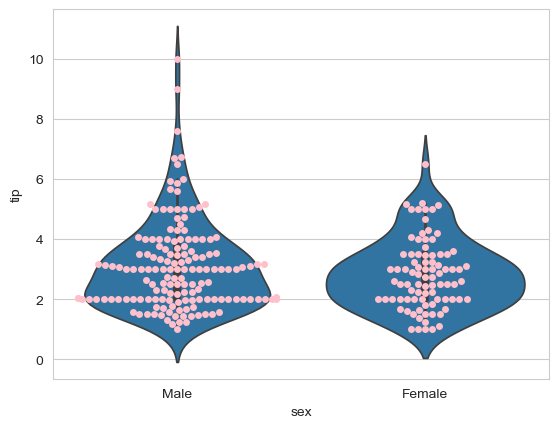

In [48]:
sns.violinplot(data=tips, x = "sex", y = "tip")        # violinplot : 데이터가 어디에 밀집되어있는지 알때 좋음
sns.swarmplot(data=tips, x = "sex", y = "tip", color = "pink")           # swarmplot : 이상치가 몇갠지까지 파악 가능 
plt.show()

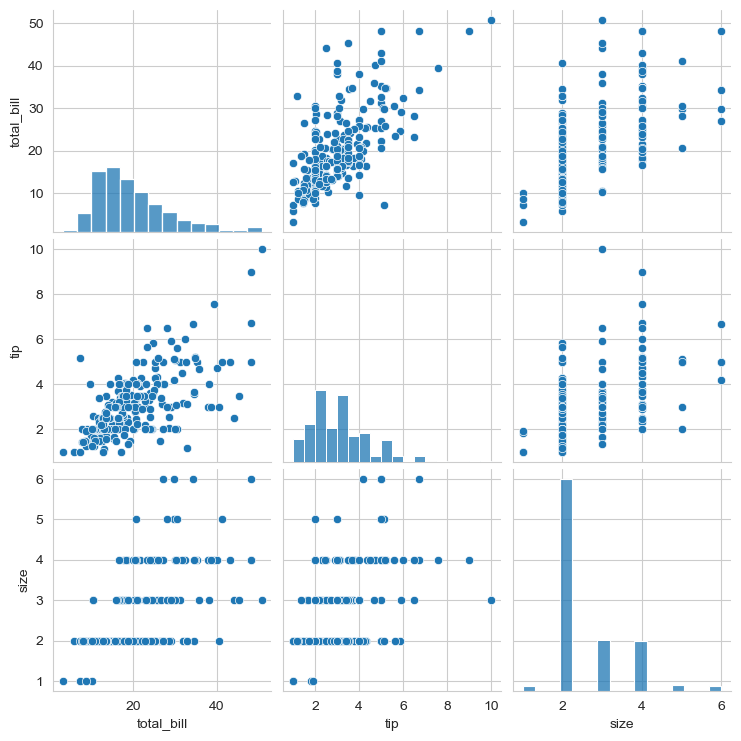

In [44]:
# 산점도 행렬
sns.pairplot(tips)
plt.show()

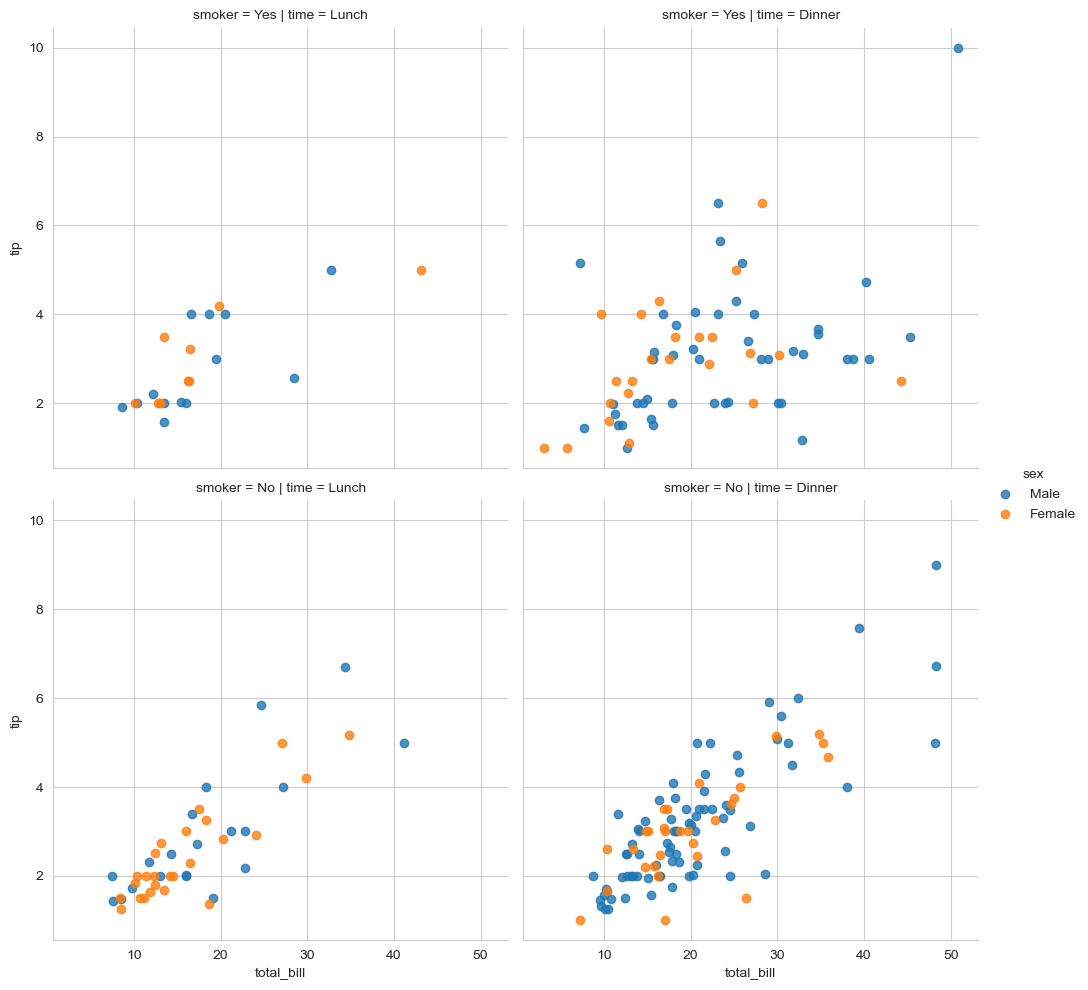

In [54]:
# 다변량 그래프 
sns.lmplot(data=tips, x = 'total_bill', y = 'tip',  hue = "sex",          # x,y에  hue 추가해 삼변량  
          fit_reg = False, col = "time", row = "smoker")           # col로 나누면서 사변량  /  row로 나누면서 오변량 
plt.show()